In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
feature_names = iris.feature_names
target_names = iris.target_names

In [7]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [8]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

In [9]:

df['species_name'] = df['species'].map(lambda i: target_names[i])

In [10]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species species_name  
0          0       setosa  
1          0       setosa  
2          0       setosa  
3          0       setosa  
4          0       setosa  
..       ...          ...  
145        2    virginica  
146        2    virginica  
147        2    virginica  
148        2    virginica  
149        2    virginica  

[150 rows x 6 columns]

In [12]:
X = df.drop(['species_name', 'species'], axis = 1)
y = df['species_name']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
model = DecisionTreeClassifier(min_samples_split = 30)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=30)

In [18]:
y_pred = model.predict(X_test)

In [21]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [22]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



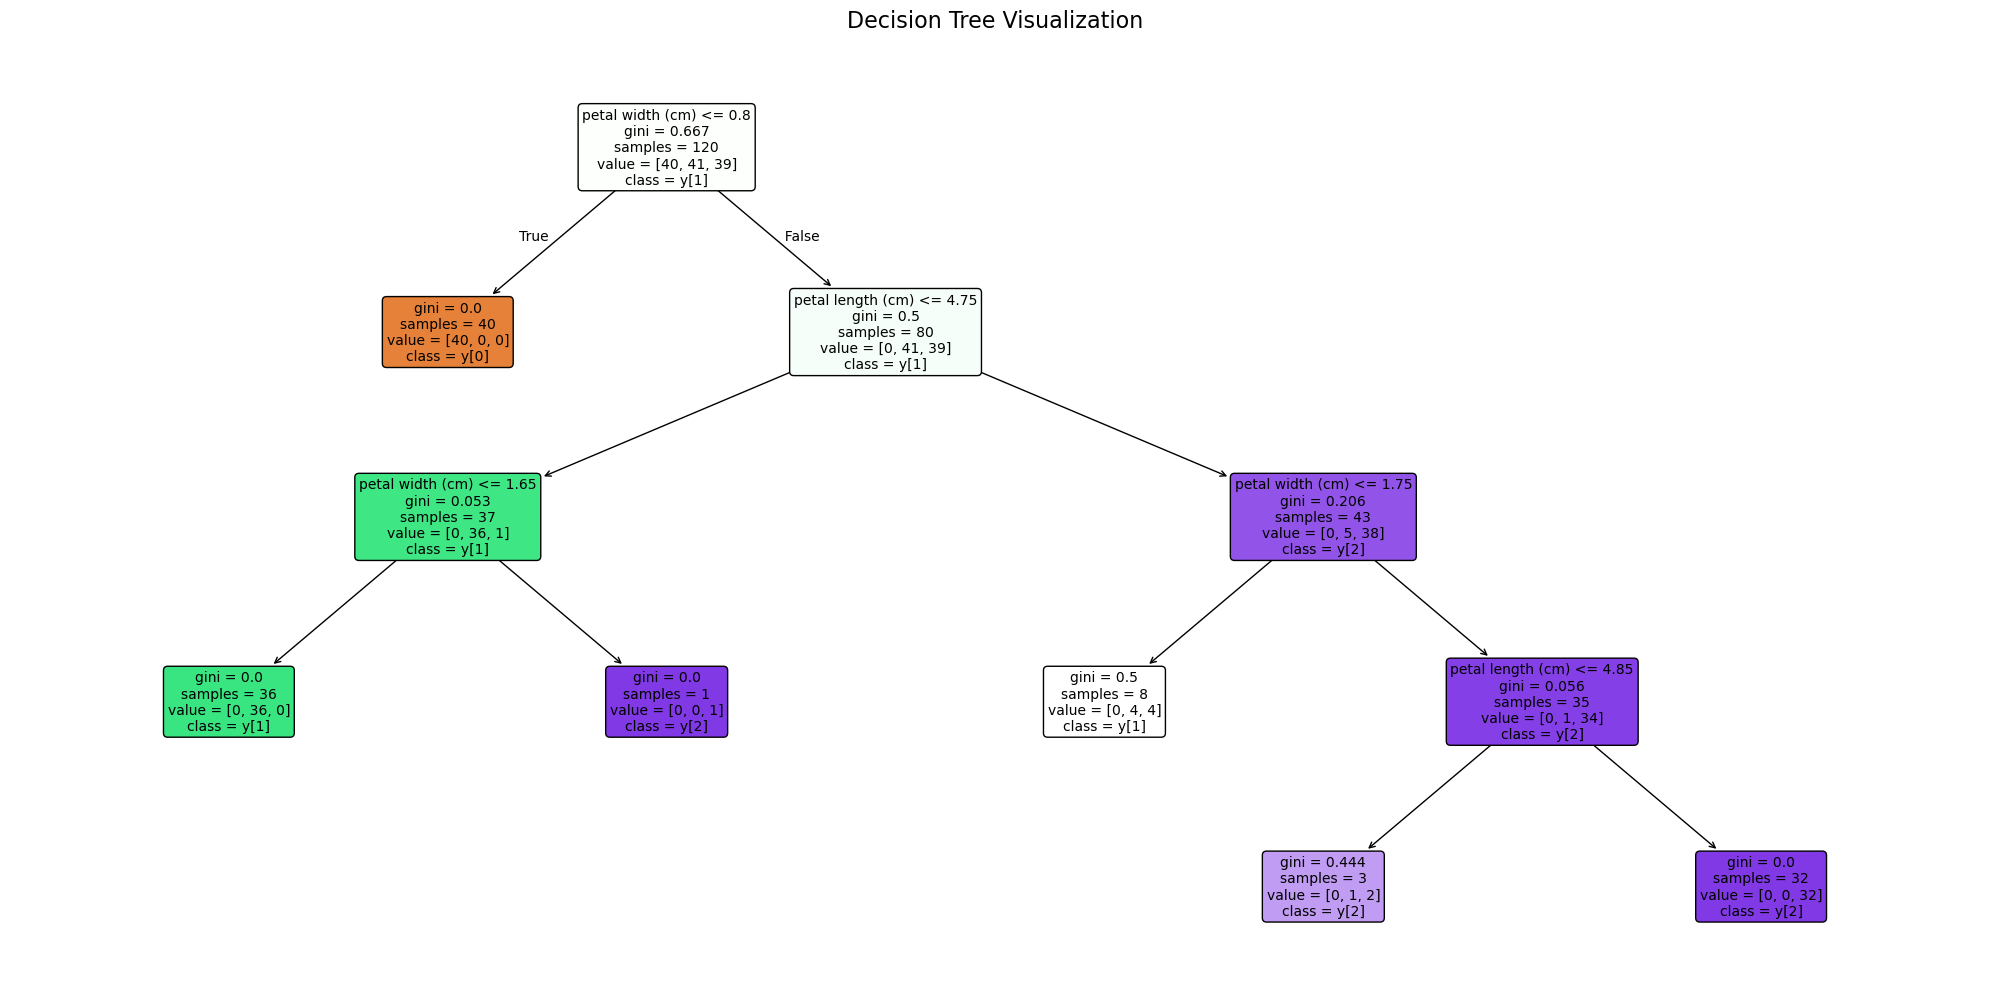

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
          filled=True,
          feature_names = df.columns[:-2],
          class_names=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [24]:
print(classification_report(model.predict(X_train), y_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.98      0.91      0.94        44
   virginica       0.90      0.97      0.93        36

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [29]:
df_new = pd.read_csv('heart_cleveland.csv')

In [30]:
df_new

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     0          0  
2        2   0     0          0  
3        1   1     0          1  
4        1   0     0          0  
..     ...  ..   ...        ...  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  

[297 rows x 14 columns]

In [31]:
X = df_new.drop('condition', axis = 1)
y = df_new['condition']

In [32]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0     0  
3        1   1     0  
4        1   0     0  
..     ...  ..   ...  
292      0   0     2  
293      1   0     2  
294      1   0     2  
295      0   0     0  
296      0   0     2  

[297 rows x 13 columns]

In [33]:
model2 = DecisionTreeClassifier()
model2.fit(X, y)

DecisionTreeClassifier()

In [34]:
plt.figure(figsize=(200, 100))
plot_tree(model2, 
          filled=True,
          feature_names = df_new.columns[:-1],
          class_names=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()